# Notebook 1: Reading data and preprocessing

# Import library and read datasets

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

# data from 2019.6,7,8
yellow_trip_6 = pd.read_csv(r"../raw_data/yellow_tripdata_2019-06.csv",index_col=False,delimiter=",")
yellow_trip_7 = pd.read_csv(r"../raw_data/yellow_tripdata_2019-07.csv",index_col=False,delimiter=",")
yellow_trip_8 = pd.read_csv(r"../raw_data/yellow_tripdata_2019-08.csv",index_col=False,delimiter=",")
yellow_trip = pd.concat([yellow_trip_6,yellow_trip_7,yellow_trip_8])

# Preprocessing

In [2]:
yellow_trip.dropna(inplace = True)

## Remove noisy data of non-continuous features

In [3]:
## 1: Select valid VendorID
yellow_trip = yellow_trip.loc[(yellow_trip['VendorID']==1)|(yellow_trip['VendorID']==2)]

## 2 Select Valid datetime and duration
yellow_trip['tpep_pickup_datetime']=pd.to_datetime(yellow_trip['tpep_pickup_datetime'],format='%Y/%m/%d %H:%M', errors='coerce')
yellow_trip['tpep_dropoff_datetime']=pd.to_datetime(yellow_trip['tpep_dropoff_datetime'],format='%Y/%m/%d %H:%M', errors='coerce')
# Generate duration
yellow_trip['duration'] = (yellow_trip['tpep_dropoff_datetime']-yellow_trip['tpep_pickup_datetime'])/np.timedelta64(1,'h') 

# Valid hour,day,month, and year
yellow_trip = yellow_trip.loc[(yellow_trip['tpep_pickup_datetime'].dt.hour >=0) & (yellow_trip['tpep_pickup_datetime'].dt.hour <=  23)]
yellow_trip = yellow_trip.loc[(yellow_trip['tpep_dropoff_datetime'].dt.hour >=0) & (yellow_trip['tpep_dropoff_datetime'].dt.hour <=  23)]

yellow_trip = yellow_trip.loc[(yellow_trip['tpep_pickup_datetime'].dt.day >0) & (yellow_trip['tpep_pickup_datetime'].dt.day <=  31)]
yellow_trip = yellow_trip.loc[(yellow_trip['tpep_dropoff_datetime'].dt.day >0) & (yellow_trip['tpep_dropoff_datetime'].dt.day <=  31)]

yellow_trip = yellow_trip.loc[(yellow_trip['tpep_pickup_datetime'].dt.month >=6) & (yellow_trip['tpep_pickup_datetime'].dt.month <=  8)]
yellow_trip = yellow_trip.loc[(yellow_trip['tpep_dropoff_datetime'].dt.month >=6) & (yellow_trip['tpep_dropoff_datetime'].dt.month <=  8)]

yellow_trip = yellow_trip.loc[(yellow_trip)['tpep_pickup_datetime'].dt.year == 2019]
yellow_trip = yellow_trip.loc[(yellow_trip)['tpep_dropoff_datetime'].dt.year == 2019]

# 3 Select valid passenger count
yellow_trip = yellow_trip.loc[(yellow_trip['passenger_count'] > 0)&(yellow_trip['passenger_count'] <= 5)]

## 4 Select valid payment type
yellow_trip = yellow_trip.loc[(yellow_trip['payment_type'] == 1)]

## 5 Filter Location ID
yellow_trip = yellow_trip.loc[(yellow_trip['PULocationID']>=1) & (yellow_trip['PULocationID'] <=  263)]
yellow_trip = yellow_trip.loc[(yellow_trip['DOLocationID']>=1) & (yellow_trip['DOLocationID'] <=  263)]

# 6 Filter Ratecode ID
yellow_trip = yellow_trip.loc[(yellow_trip)['RatecodeID'] == 1]


In [4]:
# 7 filter store_and_fwd_flag
yellow_trip['store_and_fwd_flag'].value_counts()

N    12308792
Y       93657
Name: store_and_fwd_flag, dtype: int64

In [5]:
# 9 filter extra 
yellow_trip = yellow_trip.loc[(yellow_trip['extra'] == 0)|(yellow_trip['extra'] == 0.5)| (yellow_trip['extra'] == 1)]

# 10 filter mta_tax
yellow_trip = yellow_trip.loc[(yellow_trip['mta_tax'] == 0.5)]

# 11 filter impovement surcharge
yellow_trip = yellow_trip.loc[(yellow_trip['improvement_surcharge'] == 0.3)]

# 12 filter congestion surcharge
yellow_trip = yellow_trip.loc[(yellow_trip['congestion_surcharge'] == 2.5)|(yellow_trip['congestion_surcharge'] == 0)]

## Filter outliers from continous features

In [6]:
cont_attr = ["trip_distance","fare_amount","tolls_amount","tip_amount","total_amount","duration"]

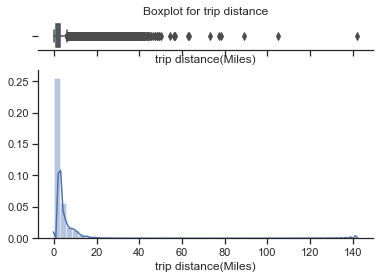

In [7]:
sns.set(style="ticks")
x = np.random.randn(100)

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                    gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(yellow_trip[cont_attr[0]], ax=ax_box)
sns.distplot(yellow_trip[cont_attr[0]], ax=ax_hist)

ax_box.set(title='Boxplot for trip distance',xlabel = "trip distance(Miles)")
ax_hist.set(xlabel = "trip distance(Miles)")
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

[Text(0.5, 1.0, 'Boxplot for fare amount of fee of yellow taxi'),
 Text(0.5, 0, 'Amount of fees(USD)')]

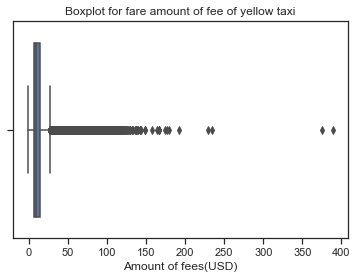

In [8]:
sns.boxplot(yellow_trip[cont_attr[1]]).set(title='Boxplot for fare amount of fee of yellow taxi',xlabel = "Amount of fees(USD)")

[Text(0.5, 1.0, 'Boxplot for toll amount of fee of yellow taxi'),
 Text(0.5, 0, 'Amount of fees(USD)')]

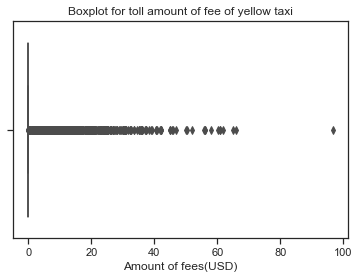

In [9]:
sns.boxplot(yellow_trip[cont_attr[2]]).set(title='Boxplot for toll amount of fee of yellow taxi',xlabel = "Amount of fees(USD)")

[Text(0.5, 1.0, 'Boxplot for tip amount of fee of yellow taxi'),
 Text(0.5, 0, 'Amount of fees(USD)')]

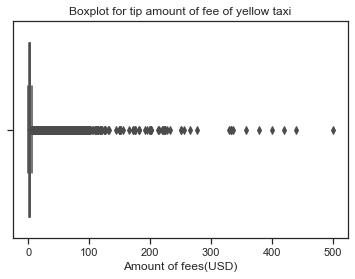

In [10]:
sns.boxplot(yellow_trip[cont_attr[3]]).set(title='Boxplot for tip amount of fee of yellow taxi',xlabel = "Amount of fees(USD)")

[Text(0.5, 1.0, 'Boxplot for total amount of fee of yellow taxi'),
 Text(0.5, 0, 'Amount of fees(USD)')]

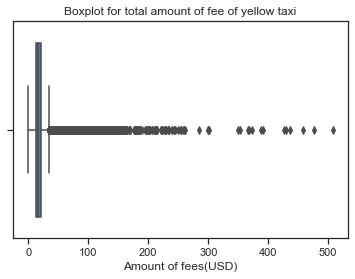

In [11]:
sns.boxplot(yellow_trip[cont_attr[4]]).set(title='Boxplot for total amount of fee of yellow taxi',xlabel = "Amount of fees(USD)")

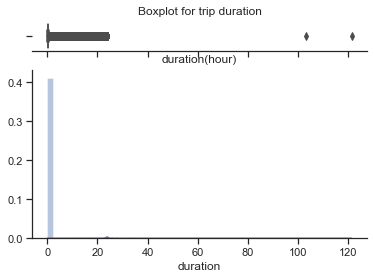

In [12]:
sns.set(style="ticks")
x = np.random.randn(100)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                    gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(yellow_trip[cont_attr[-1]], ax=ax_box)
sns.distplot(yellow_trip[cont_attr[-1]], ax=ax_hist)
ax_box.set(title='Boxplot for trip duration', xlabel='duration(hour)')
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

[Text(0.5, 1.0, 'Boxplot for income of yellow taxi'),
 Text(0.5, 0, 'Amount of fees per hour(USD/h)')]

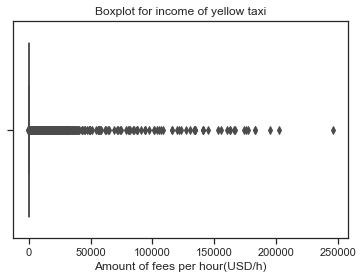

In [13]:
yellow_trip['Income'] = (yellow_trip['fare_amount']+yellow_trip['tip_amount'])/yellow_trip['duration']
sns.boxplot(yellow_trip['Income']).set(title='Boxplot for income of yellow taxi',xlabel = "Amount of fees per hour(USD/h)")

In [14]:
yellow_trip = yellow_trip.loc[(yellow_trip['trip_distance'] > 0 ) & (yellow_trip['trip_distance'] <=20)]
yellow_trip = yellow_trip.loc[(yellow_trip['fare_amount'] >= 2.5) & (yellow_trip['fare_amount'] <=100)]
yellow_trip = yellow_trip.loc[(yellow_trip['tolls_amount'] >= 0) & (yellow_trip['tolls_amount'] <=60)]
yellow_trip = yellow_trip.loc[(yellow_trip['total_amount'] >= 2.5) & (yellow_trip['total_amount'] <=100)]
yellow_trip = yellow_trip.loc[(yellow_trip['tip_amount'] >= 0) & (yellow_trip['tip_amount'] <=10)]
yellow_trip = yellow_trip.loc[(yellow_trip['duration'] >= 1/60 ) & (yellow_trip['duration']<=5)]
yellow_trip = yellow_trip.loc[(yellow_trip['Income'] > 0 ) & (yellow_trip['Income']<= 500)]

## Feature Engineering

In [15]:
yellow_trip["weekday"] = yellow_trip['tpep_pickup_datetime'].dt.dayofweek
yellow_trip["weekday"] = np.where((yellow_trip["weekday"]>=0) & (yellow_trip["weekday"]<=4),"Weekday","Weekend")
yellow_trip['start_date'] = yellow_trip['tpep_pickup_datetime'].dt.date
yellow_trip['hour'] = (yellow_trip['tpep_pickup_datetime'].dt.hour).astype(object)
yellow_trip['peak_time'] = np.where(((yellow_trip['hour']<=10) & (yellow_trip['hour']>=6))|((yellow_trip['hour']<19) & (yellow_trip['hour']>=15)),"peak","non-peak")

### Combine weather dataset to yellow taxi 

In [16]:
# Import external data and reset weather dataset value
# Source: 
weather_6 = pd.read_csv("../raw_data/2019_06_weather.csv")
weather_7 = pd.read_csv("../raw_data/2019_07_weather.csv")
weather_8 = pd.read_csv("../raw_data/2019_08_weather.csv")
# change format and column, row index name for weather dataset
weather = pd.concat([weather_6,weather_7,weather_8])
weather['time'] = pd.to_datetime(weather['time'],format='%Y/%m/%d', errors='coerce')
weather['time'] = weather['time'].dt.date

# Set time as index and drop extra time and change column name of weather to integer
weather.index = weather['time']
weather.drop('time',1,inplace = True)
weather.columns = range(24)



In [17]:
# Simplyify categorical variable in weather dataframe
Sunny = ["Mostly Cloudy","Fair","Partly Cloudy","Fair / Windy","Mostly Cloudy / Windy","Cloudy","Partly Cloudy / Windy"]
Rain = ["Light Rain","Rain","Light Rain with Thunder","Heavy Rain","Light Drizzle","Light Rain / Windy"]

# This function changes the weather condition into 3 categories
def change_weather(value):
    if value in Sunny:
            return "Sunny"
    elif value in Rain:
            return "Rain"
    else:
            return "Other"
 
for i in range(24):
    weather.loc[:,i] = weather.loc[:,i].apply(change_weather)

    

In [18]:
# Merge weather to yelllow_trip
new_weather = weather.stack().reset_index()
new_weather.set_axis(['time','hour','weather'], axis=1,inplace = True)
yellow_trip = yellow_trip.merge(new_weather, left_on= ['start_date','hour'],right_on = ['time','hour'])
yellow_trip.drop("time",1,inplace = True)

## Drop irrelevant features

In [19]:
# Drop unuseful feature
drop_attr = ["VendorID","tpep_dropoff_datetime","passenger_count",
             "improvement_surcharge","mta_tax","store_and_fwd_flag",
             "extra","tolls_amount","payment_type","total_amount",
             "congestion_surcharge","DOLocationID","RatecodeID","tpep_pickup_datetime"]

yellow_trip.drop(drop_attr,1,inplace = True)

## Distribution plot for continous attributes

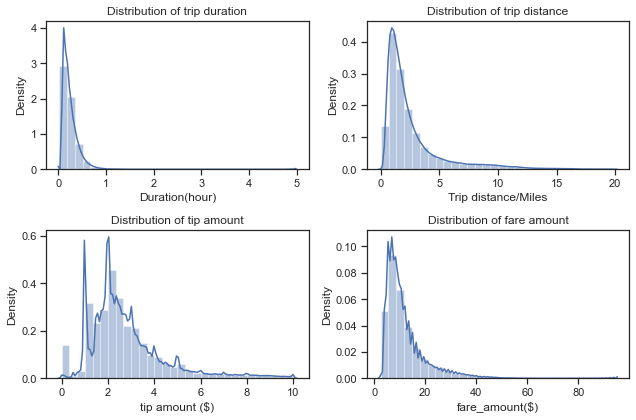

In [20]:
figure = plt.figure(figsize=(9,6))
plt.subplot(221)
sns.distplot(yellow_trip['duration'], bins=30).set(title='Distribution of trip duration', xlabel='Duration(hour)', ylabel='Density')
plt.subplot(222)
sns.distplot(yellow_trip['trip_distance'], bins=30).set(title='Distribution of trip distance', xlabel='Trip distance/Miles', ylabel='Density')
plt.subplot(223)

sns.distplot(yellow_trip['tip_amount'], bins=30).set(title='Distribution of tip amount', xlabel='tip amount ($)', ylabel='Density')

plt.subplot(224)
sns.distplot(yellow_trip['fare_amount'], bins=30).set(title='Distribution of fare amount', xlabel='fare_amount($)', ylabel='Density')
plt.tight_layout() 
plt.show()

figure.savefig('../plots/distribution of continous attributes.png')

# Distribution of discrete feature

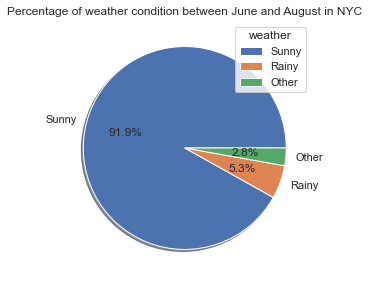

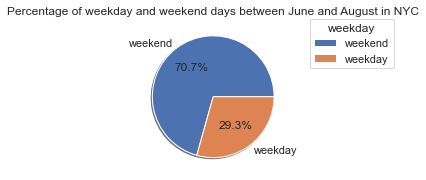

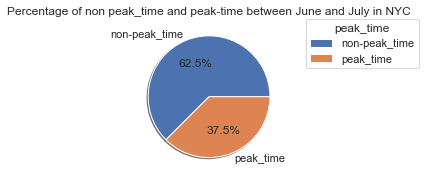

In [21]:
# weather, peak time, weekday proportion pie chart
 
figure = plt.figure(figsize=(10,7))
plt.subplot(121)


y = (yellow_trip[['start_date','hour','weather']].drop_duplicates())['weather'].value_counts()
mylabels = ["Sunny","Rainy","Other"]

plt.pie(y, labels = mylabels, shadow = True,autopct='%1.1f%%',)
plt.title("Percentage of weather condition between June and August in NYC")
plt.legend(title = "weather")
plt.show()

# Trip frequency by weekend
plt.subplot(122)
data = (yellow_trip[['start_date','weekday']].drop_duplicates())['weekday'].value_counts()
plt.pie(data, labels = ["weekend","weekday"], shadow = True,autopct='%1.1f%%',)
plt.title("Percentage of weekday and weekend days between June and August in NYC")
plt.legend(title = "weekday",bbox_to_anchor=(1.1, 1.05))
plt.show()

plt.subplot(122)
# Trip frequency by peak time
data = (yellow_trip[['start_date','hour','peak_time']].drop_duplicates())['peak_time'].value_counts()
plt.pie(data, labels = ["non-peak_time","peak_time"], shadow = True,autopct='%1.1f%%',)
plt.title("Percentage of non peak_time and peak-time between June and July in NYC")
plt.legend(title = "peak_time",bbox_to_anchor=(1.1, 1.05))
plt.show()

figure.savefig('../plots/distribution from three discrete features.png')

## Dataset shape

In [22]:
yellow_trip_train.shape

NameError: name 'yellow_trip_train' is not defined

In [ ]:
yellow_trip_test.shape

## Output csv to feather

In [ ]:
yellow_trip_train = yellow_trip.loc[yellow_trip['start_date']<= pd.datetime.date(pd.datetime(2019,7,31))]
yellow_trip_test = yellow_trip.loc[yellow_trip['start_date']>= pd.datetime.date(pd.datetime(2019,8,1))]

In [ ]:
yellow_trip_train.reset_index().to_feather('../preprocessed_data/yellow_trip_train.feather')
yellow_trip_test.reset_index().to_feather('../preprocessed_data/yellow_trip_test.feather')